Als erstes lade ich das Dataset und verschaffe mir ein Überblick über die Daten.

In [197]:
import pandas as pd

file_path = 'Fischdaten.csv'
fish_data = pd.read_csv(file_path)


fish_data.head(), fish_data.info(), fish_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


(  Species  Weight  Length1  Length2  Length3   Height   Width
 0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
 1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
 2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
 3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
 4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340,
 None,
             Weight     Length1     Length2     Length3      Height       Width
 count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
 mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
 std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
 min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
 25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
 50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
 75%     650.000000   32.700000   35.500000   39.65000

Wie es aussieht gibt es keine fehlenden Werte. Allerdings ist für Weight ein minimaler Wert von 0 angegeben. Dies ist eventuell ein Datenfehler.

In [198]:
cleaned_fish_data = fish_data[fish_data['Weight'] > 0]

cleaned_fish_data.head(), cleaned_fish_data.info(), cleaned_fish_data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  158 non-null    object 
 1   Weight   158 non-null    float64
 2   Length1  158 non-null    float64
 3   Length2  158 non-null    float64
 4   Length3  158 non-null    float64
 5   Height   158 non-null    float64
 6   Width    158 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.9+ KB


(  Species  Weight  Length1  Length2  Length3   Height   Width
 0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
 1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
 2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
 3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
 4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340,
 None,
             Weight     Length1     Length2     Length3      Height       Width
 count   158.000000  158.000000  158.000000  158.000000  158.000000  158.000000
 mean    400.847468   26.293038   28.465823   31.280380    8.986790    4.424232
 std     357.697796   10.011427   10.731707   11.627605    4.295191    1.689010
 min       5.900000    7.500000    8.400000    8.800000    1.728400    1.047600
 25%     121.250000   19.150000   21.000000   23.200000    5.940600    3.398650
 50%     281.500000   25.300000   27.400000   29.700000    7.789000    4.277050
 75%     650.000000   32.700000   35.750000   39.67500

Ich möchte mir nun die Verteilung der Daten ansehen. Hierzu nutze ich ein Boxplot.

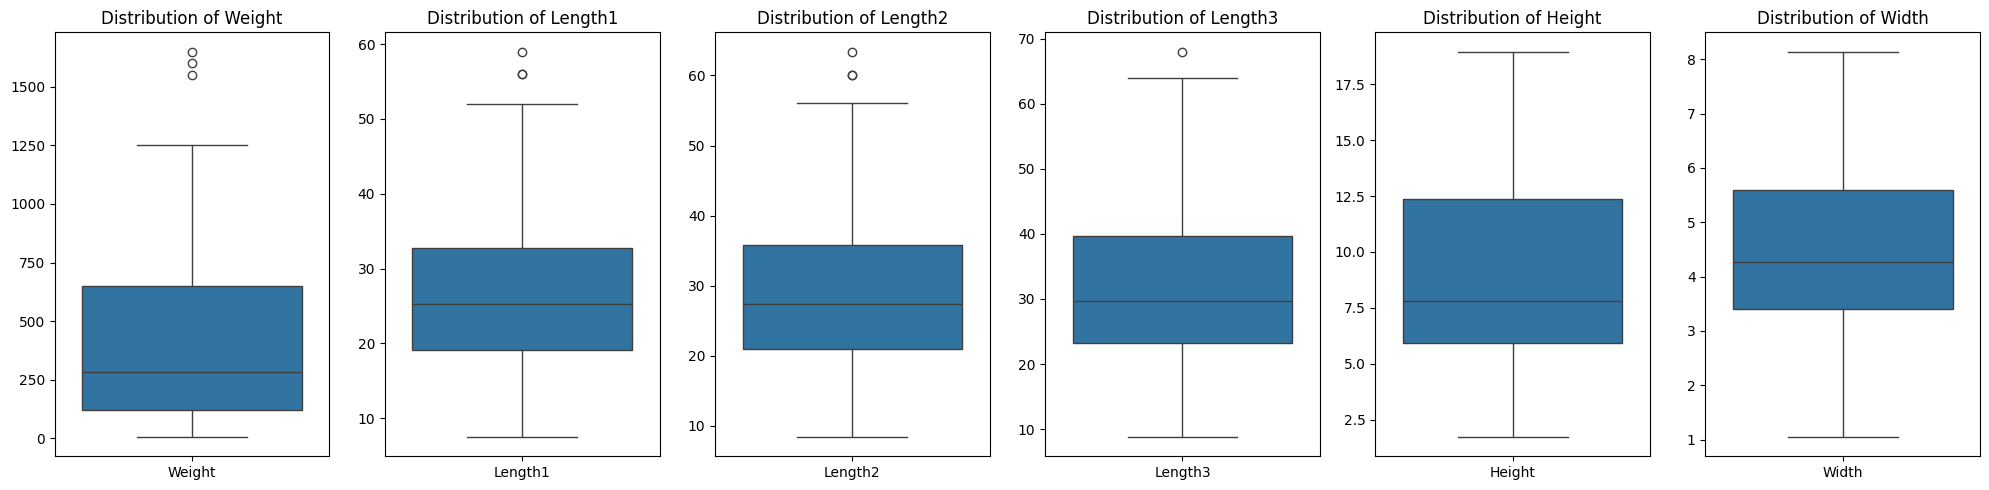

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt

# Liste der numerischen Spalten im Datensatz
numeric_columns = cleaned_fish_data.select_dtypes(include=[float, int]).columns

# Erstellen der Subplots in einer Zeile
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(20, 5))

# Generieren der Boxplots für jede numerische Spalte
for ax, column in zip(axes, numeric_columns):
    sns.boxplot(data=cleaned_fish_data[[column]], ax=ax)  # Verwenden Sie doppelte eckige Klammern, um einen DataFrame zu übergeben
    ax.set_title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


Meine Interpretation des Boxplots:

Es sind recht wenig Außreißer vorhanden. Die Daten sind für Length1 Length2 und Length3 recht gleichmäßig verteilt. Ich werde im nächsten Schritt die Daten skalieren. Hierfür nutze ich zunächst den StandardScaler.

Ich wandle nun die kategorischen Variablen in numerische Variablen um. In diesem Fall ist es Species.
Hierzu wende ich das One-Hot-Encoding an, da es sich hier nicht um eine Ordnung handelt.
Bei kategorischen Variablen ergibt es Sinn mit dem One-Hot-Encoding zu arbeiten und durch drop_first=True eine Dummy Variable zu entfernen, um Multikollinearität zu vermeiden.

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Hier wird das Datenset in ein One-Hot-Encoding umgewandelt
fish_data_encoded = pd.get_dummies(cleaned_fish_data, columns=['Species'], drop_first=True)

# Features werden definiert
X = fish_data_encoded.drop('Weight', axis=1)
y = fish_data_encoded['Weight']

# Nun unterteile ich das Datenset in Trainings- und Testdaten zufällig (Task 1.1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)


# In Anbetracht meiner Analyse der Boxplots, werde ich die Daten mit einem StandardScaler skalieren
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((110, 11), (48, 11), (110,), (48,))

In [201]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Einbetten der Daten in ein lineares Regressionsmodell (Task 1.2)
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_y_pred = lr_model.predict(X_test_scaled)

# Einbetten der Daten in ein Random Forest Regressionsmodell (Task 1.2)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_y_pred = rf_model.predict(X_test_scaled)

# Berechnung von RMSE und R^2 für Lineare Regression und RandomForest  (Task 1.3)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_y_pred))
lr_r2 = r2_score(y_test, lr_y_pred)

rf_rmse = np.sqrt(mean_squared_error(y_test, rf_y_pred))
rf_r2 = r2_score(y_test, rf_y_pred)

lr_rmse, lr_r2, rf_rmse, rf_r2


(np.float64(92.3303773503907),
 0.9306997867463991,
 np.float64(71.38500294604142),
 0.9585753055641395)

In Anbetracht der Fehlermetriken, schneidet der Random Forest Regressor am besten ab sowohl in der Trainings- als auch in der Testphase.
(rf_rmse < lr_rmse und rf_r2 > lr_r2)

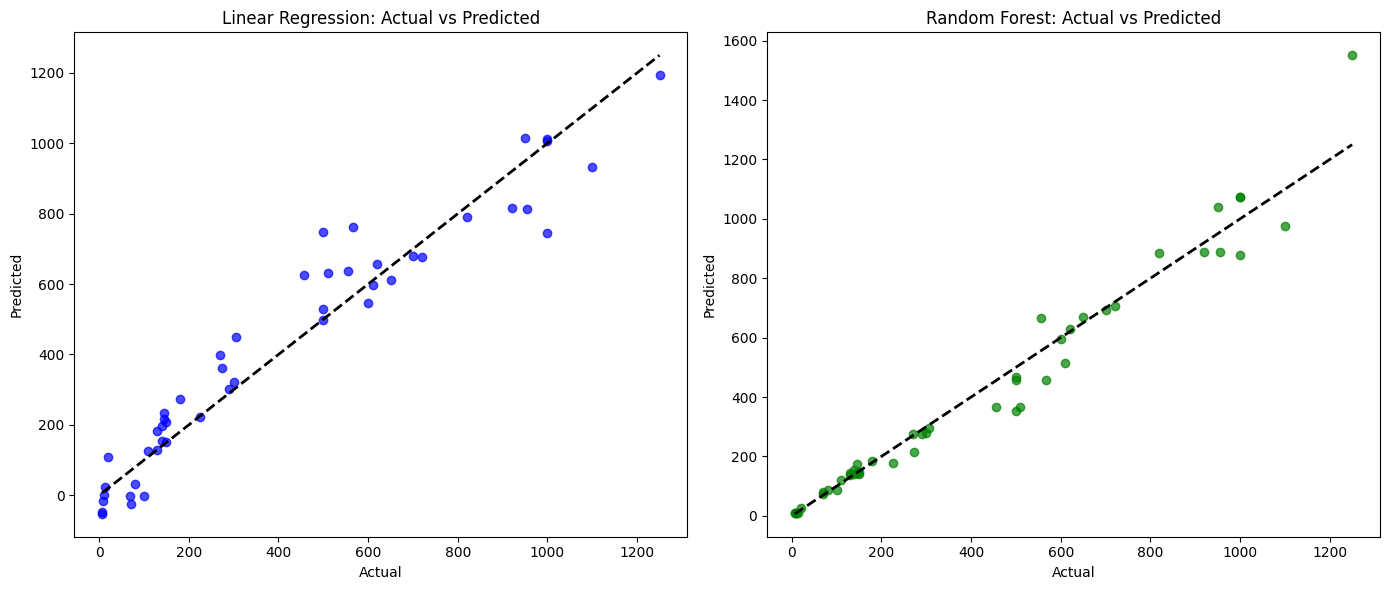

In [202]:
# Plot für Linear Regression (Task 1.4)
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression: Actual vs Predicted')

# Plot für Random Forest (Task 1.4)
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_y_pred, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest: Actual vs Predicted')

plt.tight_layout()
plt.show()

Entsprechend wie zuvor beschrieben, sind die Fehlermetriken für den Random Forest Regressor besser als für den Linearen Regressor.
Die tatsächlichen Werte sind beim Random Forest Regressor näher an den vorhergesagten Werten als beim Linearen Regressor.

RMSE ist in diesem Datenbeispiel eine bessere Fehlermetrik als R2, da RMSE die Abweichung der Vorhersagen von den tatsächlichen Werten misst, während R2 die Anpassung des Modells anhand der Varianz der Abhängigen Variablen zu den unabhängigen Variablen misst. (Task 1.5)

In Task 2 wird nun der Training-Test Split mittels StratifiedShuffleSplit ausgeführt um repräsentative Trainings- und Testdaten entsprechend der Klassenverteilung zu erhalten.

In [203]:
from sklearn.model_selection import StratifiedShuffleSplit

# Zurücksetzen des Indexes, um sicherzustellen, dass die Indizes fortlaufend sind
cleaned_fish_data = fish_data[fish_data['Weight'] > 0].reset_index(drop=True)

# Erstellen einer Instanz von StratifiedShuffleSplit (Task 2.1)
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Ausführen des Split-Vorgangs (Task 2.1)
for train_index, test_index in stratified_split.split(cleaned_fish_data, cleaned_fish_data['Species']):
    strat_train_set = cleaned_fish_data.loc[train_index]
    strat_test_set = cleaned_fish_data.loc[test_index]


# Definieren der Features und Zielvariablen
X_train_strat = strat_train_set.drop('Weight', axis=1)
y_train_strat = strat_train_set['Weight']
X_test_strat = strat_test_set.drop('Weight', axis=1)
y_test_strat = strat_test_set['Weight']


# One-Hot Encoding für die 'Species'-Spalte wie in Task 1
X_train_strat_encoded = pd.get_dummies(X_train_strat, columns=['Species'], drop_first=True)
X_test_strat_encoded = pd.get_dummies(X_test_strat, columns=['Species'], drop_first=True)

# Hier wird auch StandardScaler verwendet
X_train_strat_scaled = scaler.fit_transform(X_train_strat_encoded)
X_test_strat_scaled = scaler.transform(X_test_strat_encoded)

X_train_strat_scaled.shape, X_test_strat_scaled.shape, y_train_strat.shape, y_test_strat.shape

((110, 11), (48, 11), (110,), (48,))

In [204]:
# Linear Regression
lr_model_strat = LinearRegression()
lr_model_strat.fit(X_train_strat_scaled, y_train_strat)
lr_y_pred_strat = lr_model_strat.predict(X_test_strat_scaled)

# Random Forest 
rf_model_strat = RandomForestRegressor(random_state=42)
rf_model_strat.fit(X_train_strat_scaled, y_train_strat)
rf_y_pred_strat = rf_model_strat.predict(X_test_strat_scaled)

# RMSE und R^2 Berechnungen
lr_rmse_strat = np.sqrt(mean_squared_error(y_test_strat, lr_y_pred_strat))
lr_r2_strat = r2_score(y_test_strat, lr_y_pred_strat)

rf_rmse_strat = np.sqrt(mean_squared_error(y_test_strat, rf_y_pred_strat))
rf_r2_strat = r2_score(y_test_strat, rf_y_pred_strat)

lr_rmse_strat, lr_r2_strat, rf_rmse_strat, rf_r2_strat

(np.float64(98.50374739378354),
 0.9382788195502213,
 np.float64(76.91848188964948),
 0.9623651554625583)

Auch hier ist bereits absehbar wie in Task 1, dass der Random Forest Regressor besser abscheidet als der Lineare Regressor.

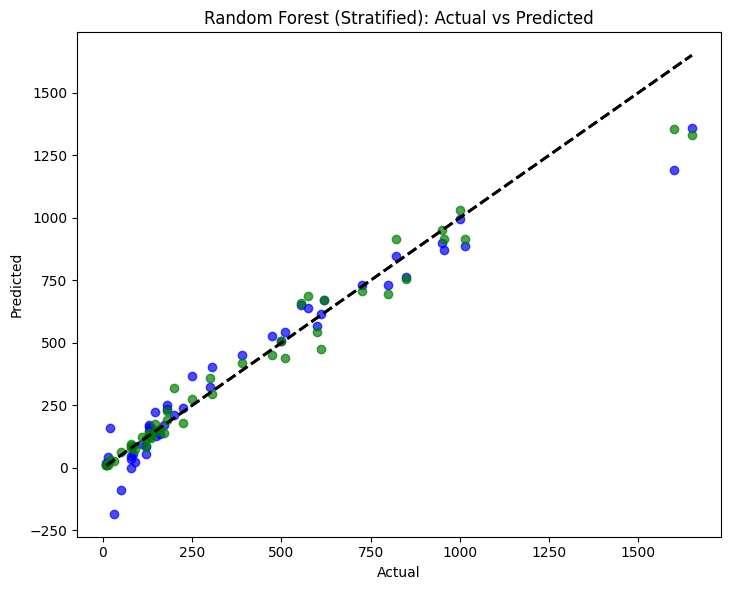

In [205]:
# Erstellung der Plots
plt.figure(figsize=(14, 6))

# Plot für Linear Regression auf stratified Daten
plt.subplot(1, 2, 1)
plt.scatter(y_test_strat, lr_y_pred_strat, alpha=0.7, color='blue')
plt.plot([y_test_strat.min(), y_test_strat.max()], [y_test_strat.min(), y_test_strat.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression (Stratified): Actual vs Predicted')

# Plot für Random Forest auf stratified Daten
plt.scatter(y_test_strat, rf_y_pred_strat, alpha=0.7, color='green')
plt.plot([y_test_strat.min(), y_test_strat.max()], [y_test_strat.min(), y_test_strat.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest (Stratified): Actual vs Predicted')

plt.tight_layout()
plt.show()


In beiden Aufgaben scheidet der Random Forest Regressor besser ab als der Lineare Regressor. In beiden Fällen eignet sich der RSME als Fehlermetrik besser als der R2 Score aufgrund der Abweichung der Vorhersagen von den tatsächlichen Werten. Das Stratifizieren der Daten hilft dabei, die Klassenverteilung in den Trainings- und Testdaten beizubehalten, hatte allerdings keinen großen Einfluss auf die Fehlermetriken oder ihren Verhältins zueinander.

Um die Performace der Modelle zu verbessern könnte man an verschiedenen Stellen ansetzen:
- Zunächst könnte man durch Feature Engineering Techniken die Daten weiter aufbereiten und bessere Abhängigkeiten zwischen den Variablen finden.
- Durch Hyperparameter wie Anzahl der Bäume, Tiefe der Bäume oder Anzahl der maximalen Features könnte im Random Forest Regressor die Performance verbessert werden.
- Man könnte auch komplett andere Modelle testen, wie z.B. Support Vector Machines oder Gradient Boosting oder auch neuronale Netze.
- Durch Cross-Validation könnte man die Modelle itarativ bewerten und schrittweise verbessern.